In [44]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
dataset = load_breast_cancer()
# print(dataset)
dataset = dataset.get('data')
data = np.array(dataset)

### K-means clustering

In [30]:
def kmeans(dataset, k):
    """
    Takes in a dataset and k -> centroids, centroid assignment for each point in the dataset
    """
    # obtain sizes of the dataset
    m = dataset.shape[0] #569 x's in the set
    dim = dataset[0].shape[0] # dimension of x is 30
    
    # choose k training points from the data to be the initial randomized cluster centroids
    mu_index = np.random.choice(m, k) # choose k indices from data (up to m)
    mus = np.empty([k, dim]) # initialize mu's to have k clusters that are 30 dim each
    temp = 0 # for iterating through 
    for i in mu_index:
        mus[temp]= dataset[i] #selecting the points from the dataset
        temp+=1
    
    #initializing for cluster assignment
    dists = np.zeros([m, k]) # distance to each cluster (k) / data point (m)
    previous_dists = np.zeros([m, k]) # to compare distances for convergence in the loop (coverge when difference = 0)
    iterating = True
    
    while iterating: #keep looping until convergence
        
        # DISTANCE CALCULATION
        for c_index, centroid in enumerate(mus): # for each centroid
            #c_index = index of centroid (to k), centroid= mxdim for that centroid
            
            for i in range(m): #for every point m
                
                #calculate distances to centroids - Euclidean with np.linalg.norm
                dists[i, c_index] = np.linalg.norm(dataset[i] - centroid) #dataset[i] is 1x30, centroid is 1x30
                    #dists is a m x k array: for every point (m points), there are k distances to the k centroids
                    # dists is a summary of all the distances to centroids for each point

        # MINIMUM DISTANCES
        #find centroid index c with min distance to the points [argmin]
        c = np.argmin(dists, axis=1)
            # c is a vector of size m (569) containing the index of the closest cluster
        
        # UPDATING CENTROIDS
        for cluster in range(k): # for every cluster/centroid
            # update the centroid to be the mean
            mus[cluster] = np.mean(dataset[c == cluster], 0)
        
        # ITERATION CONVERGENCE 
            # set it to converge when the previous distances to centroids = the new distances
            if np.linalg.norm(dists[cluster] - previous_dists[cluster]) == 0:
                iterating = False
    
        previous_dists = dists # set current dist to be the new previous dists for next iteration

    return mus, c # returns centroids mus, and assignments c

#### Run K-means
Running k-means with k between 2 and 7. Justify the data passed in as the input.

In [5]:
k = 2
centroids = []
while k <= 7:
    mus, c = kmeans(data, k)
    centroids.append(mus)
    k +=1
# The parameters inputted into the kmeans function are the data and k. 
# After loading the UCI ML Breast Cancer Wisconsin dataset, it appears to be a dictionary 
# with the data we are seeking as the values with key of 'data'. Thus, I used a dict.get 
# function to access the values. There are 569 data points each of which has 30
# dimensions: x_1, x_2, ..., x_569 where each x_i is an element of R^30. The dictionary 
# values for key='data' was then converted to a numpy array, which was the input used for
# the function kmeans. Rather than normalizing the dataset and using random.random to 
# initialize centroids s in my algorithm, I chose to take 2 random points from the dataset. 
# In my kmeans function, I used random.choice to choose k indices from the dataset size and 
# set the initial centroids to the k random points from the set. All features were also used.
# Thus, the data passed in as the input is the original dataset (value where key='data'). 

#### Plotting Distortion
Plotting distortion for k=2 to 7.

In [6]:
def cost_function(dataset, mus, c):
    """
    Inputs: dataset, centroids, centroid assignments for every point -> J, cost function
    """
    # DISTANCE CALCULATIONS
    dists = np.zeros([dataset.shape[0], 1]) #initialize distance:1 value / data point
        # dists will contain the distance to its assigned centroid for each point
    
    for i in range(dataset.shape[0]): #for each of the points
        centroid = mus[c[i]] # c[i] is the corresponding centroid index assignment 
        dists[i] = np.linalg.norm(dataset[i] - centroid) # calculating distance
    
    # COST FUNCTION CALCULATION
    dists = np.power(dists, 2) # |x-mu|^2
    squared_sum = np.sum(dists) # sum of all dists squared
    J = 1/(dataset.shape[0]) * squared_sum # cost function = 1/m * (sum of all dists squared)
    
    return J

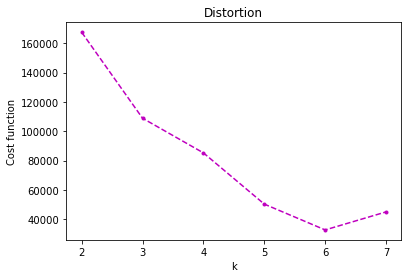

In [81]:
x = [i for i in range(2, 8)] # [2, 3, ..., 7]
y = []

k=2 #start at k=2
while k <= 7: #finish at k=7
    # print('\tk=', k)
    mus, c = kmeans(data, k)
    y.append(cost_function(data, mus, c))
    k+=1
        
plt.plot(x, y, 'm.--')
plt.xlabel("k")
plt.ylabel("Cost function")
plt.title("Distortion")
plt.show()

If you had to pick a value for k, which value would you pick?

In [ ]:
# Looking at the distortion plotted against k above, the inflection point seems to be around 4. 
# To get rid of outliers, the distortion could be calculated for each k value multiple times, 
# where we take the minimum value. A graph with shape similar to e^-x is outputted, 
# displaying an inflection point around 4 as well. Therefore, I would choose k=4. 